In [60]:
import numpy as np
import pandas as pd
import os.path as op
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp, gaussian_kde

In [2]:
burst_features_all_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/burst_features_sensors.csv"
burst_features_3SD_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/3SD_features.csv"

In [3]:
bursts_2SD = pd.read_csv(burst_features_all_path)
bursts_3SD = pd.read_csv(burst_features_3SD_path)

In [48]:
features = ["peak_freq", "peak_amp_base", "fwhm_freq", "fwhm_time"]

labels = {
    "peak_freq": ["Peak Frequency [Hz]", (13, 30), 1, 0.3],
    "peak_amp_base": ["Amplitude [fT]", (0, 130), 1e15, 0.3],
    "fwhm_freq": ["Frequency Span [Hz]", (0, 10), 1, 0.3],
    "fwhm_time": ["Duration [ms]", (0, 1000), 1e3, 2.9],
}

In [58]:
results = {}
for ft in features:
    ks, p = ks_2samp(bursts_2SD[ft].values, bursts_3SD[ft].values)    
    results[ft] = (ks, p)
    print(ft, np.round(ks, 4), np.round(p, 4))

peak_freq 0.041 0.0
peak_amp_base 0.1829 0.0
fwhm_freq 0.2154 0.0
fwhm_time 0.2594 0.0


In [64]:
for ft in features:
    datav = bursts_3SD.loc[bursts_3SD.trial_type == "visual"][ft].values*labels[ft][2]
    datam = bursts_3SD.loc[bursts_3SD.trial_type == "motor"][ft].values*labels[ft][2]
    print("visual", ft, "M =", np.round(np.mean(datav)), 4, "SD =", np.round(np.std(datav), 4))
    print("motor", ft, "M =", np.round(np.mean(datam)), 4, "SD =", np.round(np.std(datam), 4))

visual peak_freq M = 21.0 4 SD = 4.6557
motor peak_freq M = 21.0 4 SD = 4.6757
visual peak_amp_base M = 24.0 4 SD = 13.9399
motor peak_amp_base M = 23.0 4 SD = 14.3455
visual fwhm_freq M = 2.0 4 SD = 0.893
motor fwhm_freq M = 2.0 4 SD = 0.8937
visual fwhm_time M = 237.0 4 SD = 105.9183
motor fwhm_time M = 234.0 4 SD = 105.2752


In [65]:
for ft in features:
    data2 = bursts_2SD[ft].values*labels[ft][2]
    data3 = bursts_3SD[ft].values*labels[ft][2]
    print("2sd", ft, "M =", np.round(np.mean(data2)), 4, "SD =", np.round(np.std(data2), 4))
    print("3sd", ft, "M =", np.round(np.mean(data3)), 4, "SD =", np.round(np.std(data3), 4))

2sd peak_freq M = 21.0 4 SD = 4.7576
3sd peak_freq M = 21.0 4 SD = 4.665
2sd peak_amp_base M = 19.0 4 SD = 13.1465
3sd peak_amp_base M = 24.0 4 SD = 14.1272
2sd fwhm_freq M = 2.0 4 SD = 0.8184
3sd fwhm_freq M = 2.0 4 SD = 0.8933
2sd fwhm_time M = 185.0 4 SD = 97.18
3sd fwhm_time M = 235.0 4 SD = 105.6347


In [70]:
pcs = [
    'PC_1', 'PC_2', 'PC_3', 'PC_4', 
    'PC_5', 'PC_6', 'PC_7', 'PC_8', 
    'PC_9', 'PC_10', 'PC_11', 'PC_12', 
    'PC_13', 'PC_14', 'PC_15','PC_16', 
    'PC_17', 'PC_18', 'PC_19', 'PC_20'
]

subjects = bursts_2SD.subject.unique()

array(['sub-101', 'sub-102', 'sub-103', 'sub-106', 'sub-107', 'sub-108',
       'sub-109', 'sub-110', 'sub-111', 'sub-112', 'sub-113', 'sub-114',
       'sub-117', 'sub-118', 'sub-119', 'sub-120', 'sub-122', 'sub-123',
       'sub-124', 'sub-126', 'sub-127', 'sub-129', 'sub-130', 'sub-131',
       'sub-132', 'sub-133', 'sub-134', 'sub-135', 'sub-136', 'sub-138',
       'sub-139', 'sub-140', 'sub-141', 'sub-142', 'sub-143', 'sub-144',
       'sub-145'], dtype=object)

In [115]:
x = np.linspace(-15,15, num=150)
pc_res = {}
for pc in pcs:
    print(pc)
    sub_list = []
    for ix, sub in enumerate(subjects):
        ix = ix+1
        data = bursts_2SD.loc[bursts_2SD.subject == sub][pc]
        kernel = gaussian_kde(data, bw_method=0.3)
        y = kernel(x)
        sub_list.append(y)
    pc_res[pc] = np.vstack(sub_list)

PC_1
PC_2
PC_3
PC_4
PC_5
PC_6
PC_7
PC_8
PC_9
PC_10
PC_11
PC_12
PC_13
PC_14
PC_15
PC_16
PC_17
PC_18
PC_19
PC_20


In [102]:
sub_list.shape

(37, 50)

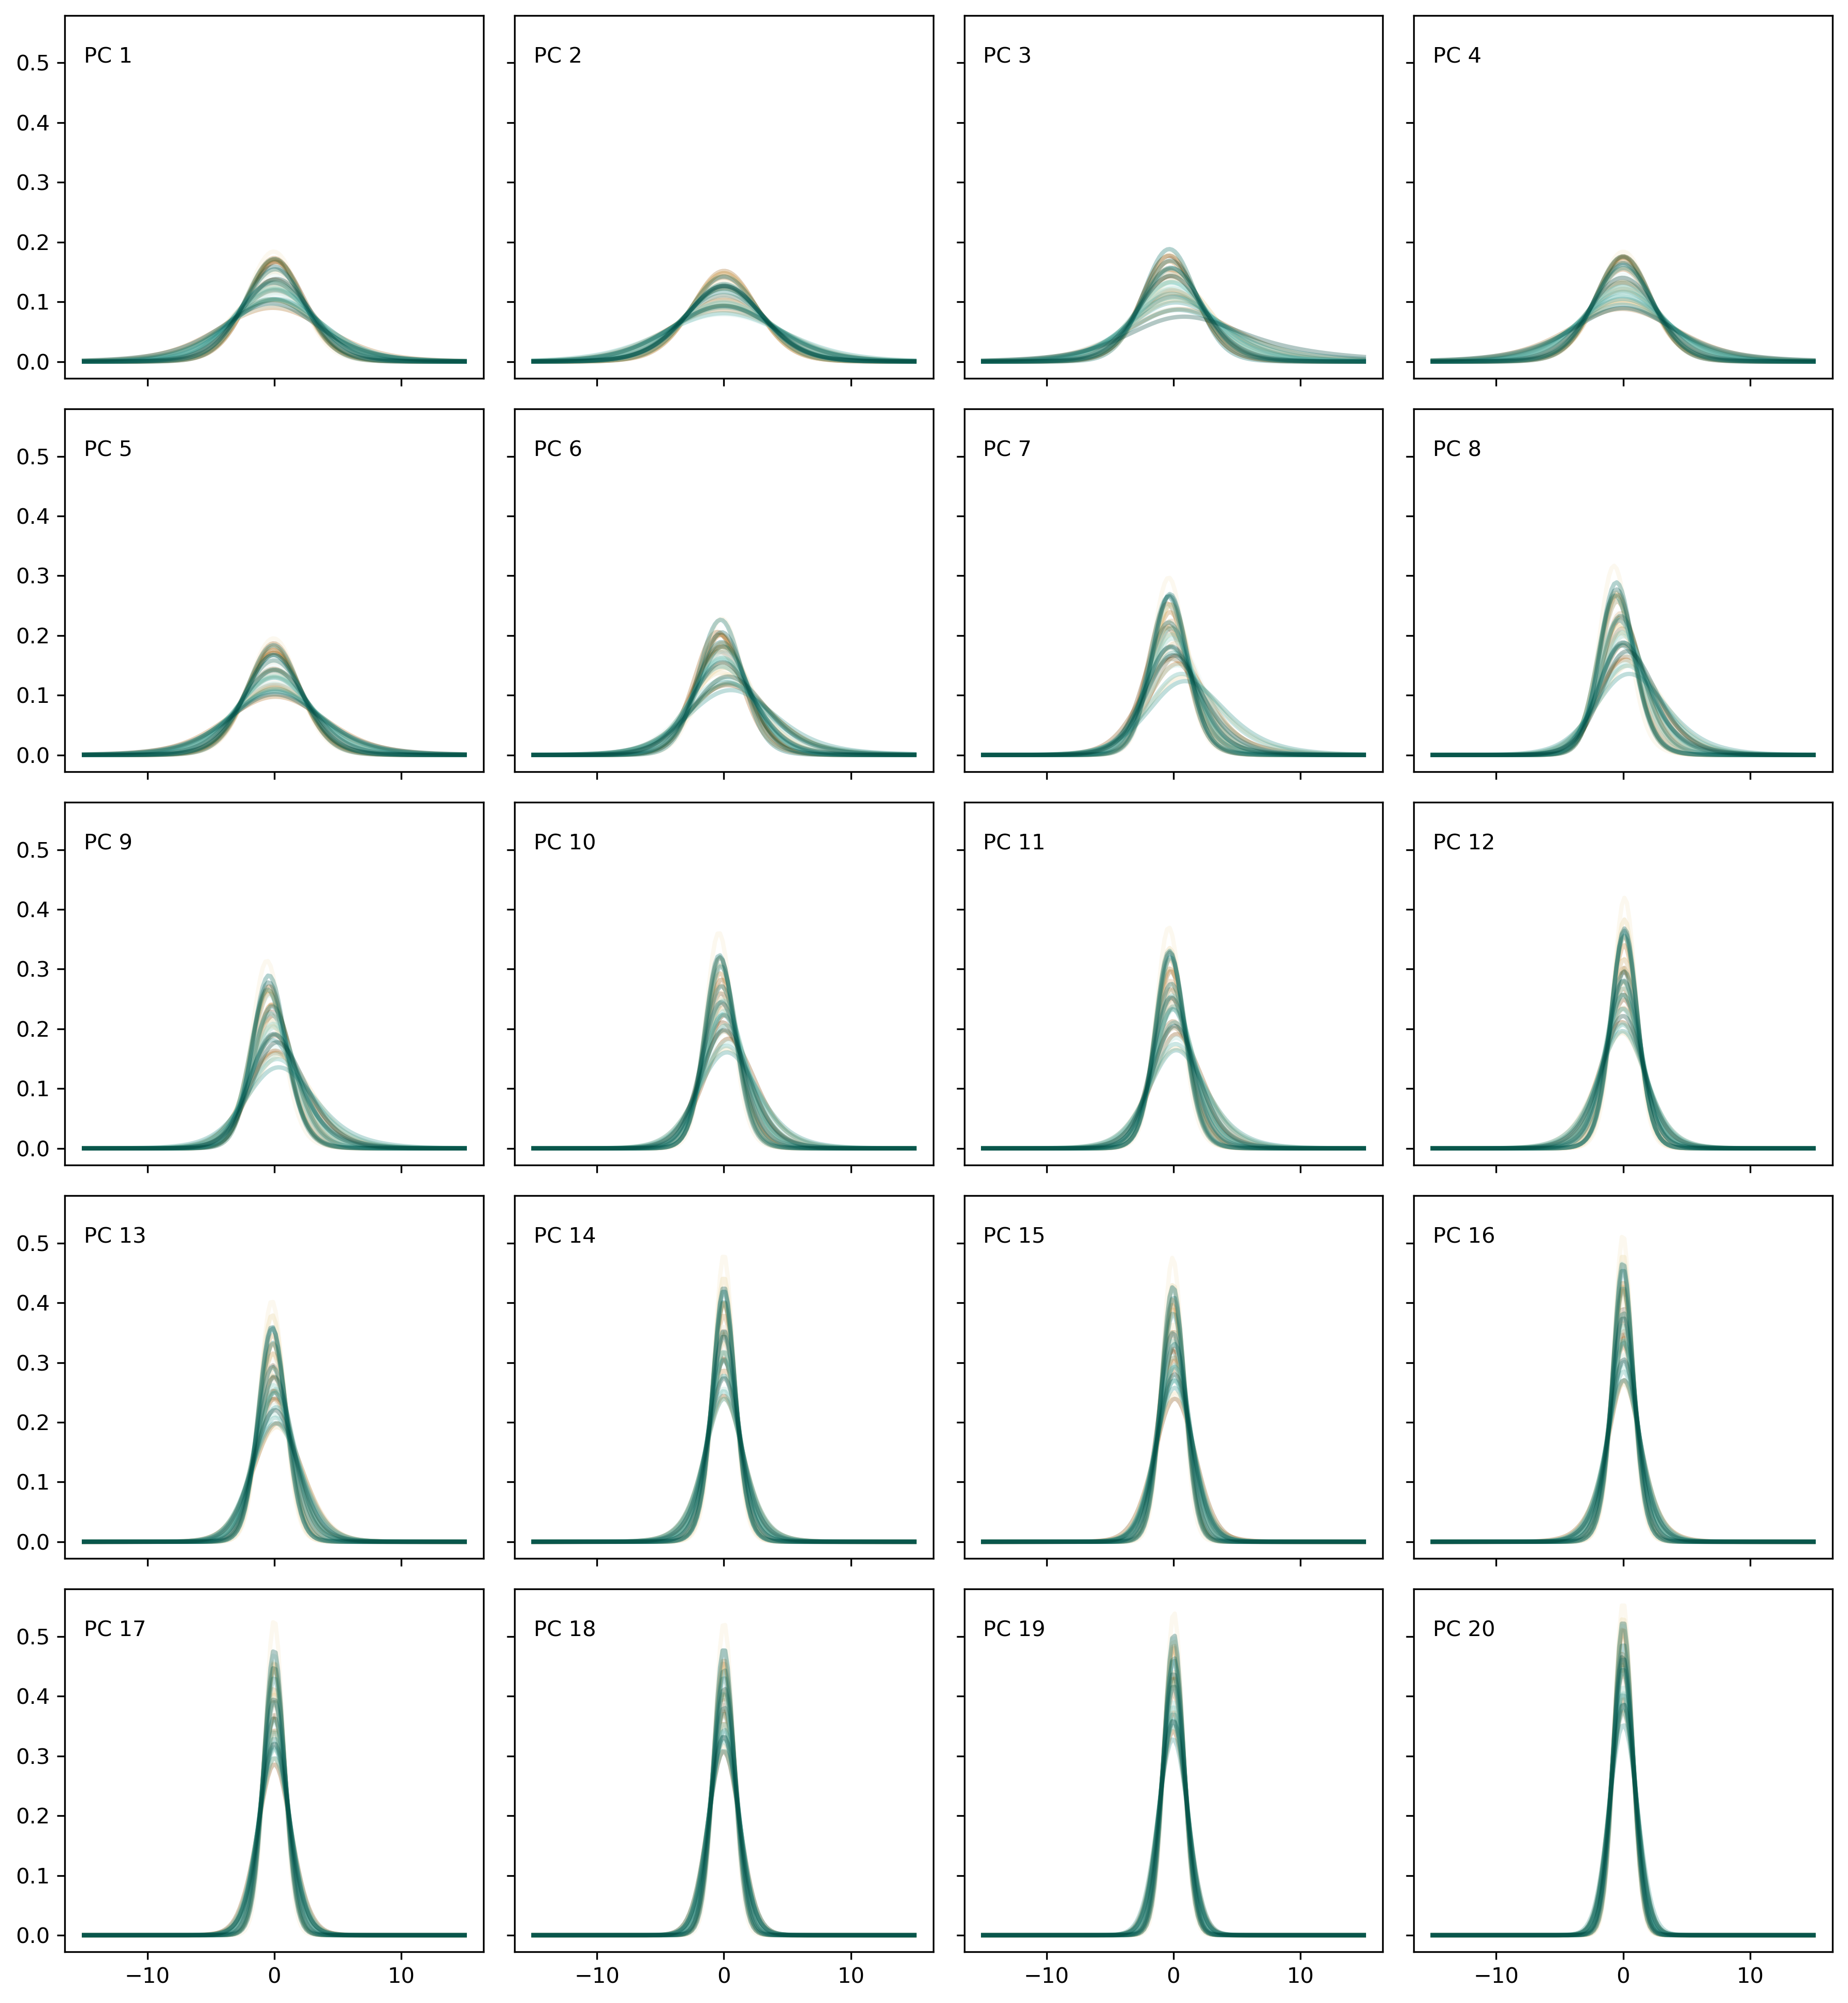

In [146]:
col_r = plt.cm.BrBG(np.linspace(0,1, num=37))
f, ax = plt.subplots(5, 4, figsize=(12, 13), dpi=300, sharex=True, sharey=True, facecolor="white")
for ix, axis in enumerate(ax.ravel()):
    pc = pcs[ix]
    axis.text(-15, 0.5, "{} {}".format(*pc.split("_")), size=10)
    for ix_l, i in enumerate(pc_res[pc]):
        axis.plot(x, i, c=col_r[ix_l], lw=2, alpha=0.3)
plt.tight_layout()
plt.savefig("/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/images/PCS_INDIVIDUAL.svg")

In [120]:
for ix_l, i in enumerate(pc_res[pc]):
    print(i.shape)

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
